In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Feature Engineering

In [2]:
path = 'data/RpgCharStats.csv'
df = pd.read_csv(path)
df

,Armor,Weapon,Physical,Magic,Level,FBoss,Class
0,45,83,45,89,77,True,Magician
1,48,88,82,65,71,True,Warrior
2,65,22,71,4,37,False,Tank
3,68,3,7,91,39,False,Sorcerer
4,68,9,49,21,27,False,Tank
...,...,...,...,...,...,...,...
995,27,43,73,90,67,True,Battlemage
996,49,69,81,30,50,True,Knight
997,72,63,19,72,61,True,Magician
998,55,37,75,27,66,False,Battlemage


**The dataset contains a categorical column "class". If we wanto to include it, we should convert them to numerical values.**
1. See all unique values for categorical variables
2. Check if theres any imbalance between the categorical values (if some record appears much more than other)

In [3]:
# check unique classes 
# df['Class'].unique()
df['Class'].value_counts()

Class
Warrior       183
Magician      170
Sorcerer      169
Knight        169
Battlemage    158
Tank          151
Name: count, dtype: int64

In [4]:
# convert categorical variable into dummy/indicator variables
# drop the first to avoid multicollinearity (the dropped will be the baseline)
# convert as integer type
df = pd.get_dummies(df, columns=['Class'], drop_first=True).astype(int)

In [5]:
# check if conversion worked
df

,Armor,Weapon,Physical,Magic,Level,FBoss,Class_Knight,Class_Magician,Class_Sorcerer,Class_Tank,Class_Warrior
0,45,83,45,89,77,1,0,1,0,0,0
1,48,88,82,65,71,1,0,0,0,0,1
2,65,22,71,4,37,0,0,0,0,1,0
3,68,3,7,91,39,0,0,0,1,0,0
4,68,9,49,21,27,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,27,43,73,90,67,1,0,0,0,0,0
996,49,69,81,30,50,1,1,0,0,0,0
997,72,63,19,72,61,1,0,1,0,0,0
998,55,37,75,27,66,0,0,0,0,0,0


In [6]:
# check if conversion worked
df.describe()

,Armor,Weapon,Physical,Magic,Level,FBoss,Class_Knight,Class_Magician,Class_Sorcerer,Class_Tank,Class_Warrior
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,50.397000,50.882000,49.003000,48.567000,54.101000,0.394000,0.169000,0.170000,0.169000,0.151000,0.18300
std,29.136065,29.245639,28.581461,28.911752,18.612717,0.488879,0.374939,0.375821,0.374939,0.358228,0.38686
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,26.000000,25.000000,24.000000,24.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,50.000000,51.000000,48.000000,48.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,76.000000,78.000000,74.000000,72.000000,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [7]:
# extract features and target variable (x and y)
X = df.drop('FBoss', axis=1)
y = df['FBoss'].to_numpy()

# Split and Train

In [8]:
# split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# train the model
# initialize model
LR = LogisticRegression().fit(X_train_std, y_train)

# predict target variable
yhat = LR.predict(X_test_std)

In [9]:
# predict probabilities
yhat_prob = LR.predict_proba(X_test_std)

In [10]:
# display probabilities (left column: prob of class 0, right column: prob of class 1)
yhat_prob.round(2)

array([[0.07, 0.93],
       [0.29, 0.71],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.11, 0.89],
       [0.42, 0.58],
       [0.34, 0.66],
       [0.84, 0.16],
       [0.58, 0.42],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.16, 0.84],
       [1.  , 0.  ],
       [0.16, 0.84],
       [0.74, 0.26],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.48, 0.52],
       [0.02, 0.98],
       [0.27, 0.73],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.94, 0.06],
       [1.  , 0.  ],
       [0.16, 0.84],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.49, 0.51],
       [0.95, 0.05],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.92, 0.08],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.08, 0.92],
       [0.  , 1.  ],
       [0.97, 0.03],
       [0.91, 0.09],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  ,

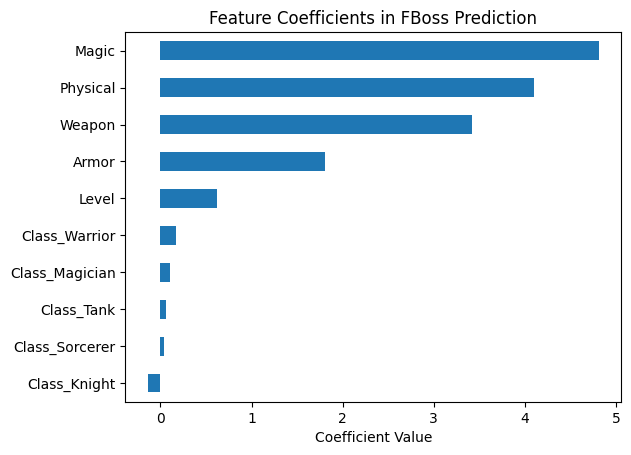

In [11]:
# examine weight of each feature
coefficients = pd.Series(LR.coef_[0], index=df.drop('FBoss', axis=1).columns)

# plot feature coefficients
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in FBoss Prediction")
plt.xlabel("Coefficient Value")
plt.show()

**Disclaimer: the classes are being measured from the class dropped above (battlemage), so it does not tell the coefficient value in relation to the boss, but in relation to the battle mage instead. For example, choosing the Knight is likely worse than choosing the battlemage**

# Visualizing

In [14]:
# display log loss for training and test sets
print(f"Log Loss on test set: {log_loss(y_test, yhat_prob)}")
print(f"Log Loss on train set: {log_loss(y_train, LR.predict_proba(X_train_std))} ")

Log Loss on test set: 0.08513447371676904
Log Loss on train set: 0.07112336685284945 


In [15]:
# display accuracy for training and test sets
print("Train set Accuracy: ", accuracy_score(y_train, LR.predict(X_train_std)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.9875
Test set Accuracy:  0.97
